### Import existing model with a360ai MDK

In [1]:
a360ai

<A360 AI Interface for project: Danish-test>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import joblib
from matplotlib import pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Set Default Data Repo and load data

In [4]:
a360ai.set_default_datarepo("test")

In [6]:
a360ai.list_datasets()

,base_name,extension,size
1,Telco-Customer-Churn.csv,csv,977501.0
2,X.parquet,parquet,174867.0
3,model.h5,h5,23392.0
4,model.onnx,onnx,5616.0
5,model1.h5,h5,52688.0
6,model2.h5,h5,52688.0
7,y.parquet,parquet,42876.0


In [8]:
X = a360ai.load_dataset("X.parquet")
y = a360ai.load_dataset("y.parquet")

#### 2. Load existing model binary

In [9]:
model = a360ai.get_object('model.h5')

In [12]:
import tensorflow as tf
rf = tf.keras.models.load_model("model.h5")

2022-06-03 10:28:59.041008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-03 10:28:59.041039: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-03 10:29:00.082433: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-03 10:29:00.082464: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-03 10:29:00.082485: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (notebook-server-danish-tf-test-onnx-2-73ed41f-0): /proc/driver/nvidia/version does not exist
2022-06-03 10:29:00.082692: I

#### 3. Test a prediction to make sure the model works as expected

In [15]:
y_pred_val = rf.predict(X)

2022-06-03 10:29:19.944195: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-03 10:29:19.944707: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2499995000 Hz


In [16]:
y_pred_val

array([[0.32531476],
       [0.30074686],
       [0.40746605],
       ...,
       [0.22647804],
       [0.3645969 ],
       [0.26208174]], dtype=float32)

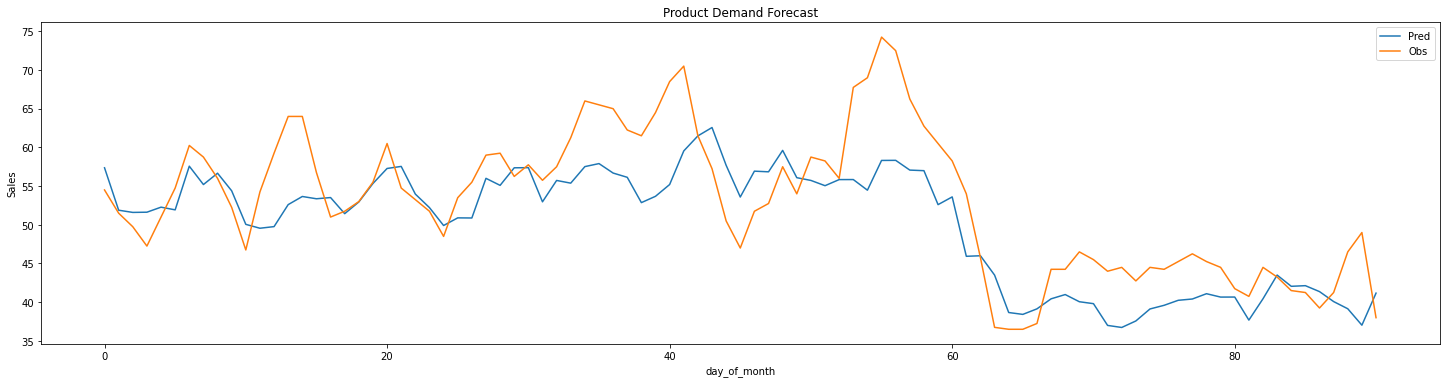

In [13]:
fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
#ax.xaxis.set_major_locator(locator)
plt.plot(y_pred_val, label='Pred')
plt.plot(df_y_val, label='Obs')
plt.tight_layout()
plt.title('Product Demand Forecast')
plt.xlabel('day_of_month')
plt.ylabel("Sales")
plt.legend()
plt.show()

#### 4. Register model with A360 AI
- Register and import the existing model with a360ai MDK
- Check on `Models` in the platform left panel, if registered successfully, the specified `model_name` will show up 

In [14]:
imported_model = a360ai.import_model(
    model_name = "demand_rf_import_tf_1",
    experiment_name = "demand_rf_import_experiment_tensorflow_1",
    model_artifact_object_in_memory = rf,
    model_flavor = "tensorflow",
    model_type = "classification",
    enable_drift_monitoring=True,
    train_features=X,
    train_target=y,
    feature_names=list(X.columns)
)


//-- Experiment Loaded --//
Model Name: demand_rf_import_drift
Experiment Name: demand_rf_import_experiment_drift
Final Run Id: None
Model Flavor: sklearn
Input Signature: trend-index float, day_of_month big_integer, day_of_year big_integer, week_of_year big_integer, year big_integer, is_wknd big_integer, is_month_start big_integer, is_month_end big_integer, month_1 big_integer, month_2 big_integer, month_3 big_integer, month_4 big_integer, month_5 big_integer, month_6 big_integer, month_7 big_integer, month_8 big_integer, month_9 big_integer, month_10 big_integer, month_11 big_integer, month_12 big_integer
Output Signature: sales float
Data Exploration File: /home/jovyan/import_model.ipynb
Data Preparation File: /home/jovyan/import_model.ipynb
Model Training File: /home/jovyan/import_model.ipynb
Drift Monitoring Enabled: True

